# Understanding Factors in Animal Shelter Pet Adoption - Data Story

In efforts to understand trends in pet adoption outcomes, the Austin Animal Center has provided data relating to the pets in their adoption center. Understanding this data and using it to model the factors that influence pet adoption could lead to recommendations that improve the performance of the center and help more pets find homes.

### Objective

In this project I will be exploring the data and using visualizations to answer some basic questions, including:

   1. How likely are adoptions for cats vs. dogs?
   2. Do factors such as color, breed and age affect the outcome for animal adoptions?
   3. Are there trends by years for adoptions of cats and dogs?
   
First I will begin by importing the necessary packages for analysis, as well as the dataset that was cleaned and formatted **[here](https://github.com/emenriquez/Springboard-Coursework/blob/master/Capstone%20Project%201/Data%20Wrangling%20-%20Pet%20Adoption%20V2.ipynb)**

In [1]:
# For working with dataframes and manipulation
import numpy as np
import pandas as pd

# Used to create and customize graphics/plots
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Used to work with datetime and timedelta objects
from datetime import datetime, timedelta

In [2]:
# Load the formatted dataset
data = pd.read_pickle('data/data_clean.pkl')

### 1. How Likely are adoptions for Cats vs. Dogs?

It is very important to understand the general distributions of outcomes for cats and dogs, as well as the total number of each that the center recieves, in order to efficiently provide resources to shelter these animals. This section will break down the outcomes for both cats and dogs in order to gain more insight into the placement of these animals in permanent homes.

In [3]:
# Separate dataset entries into those for cats and dogs
cats = data[data['Animal Type'] == 'Cat']
dogs = data[data['Animal Type'] == 'Dog']

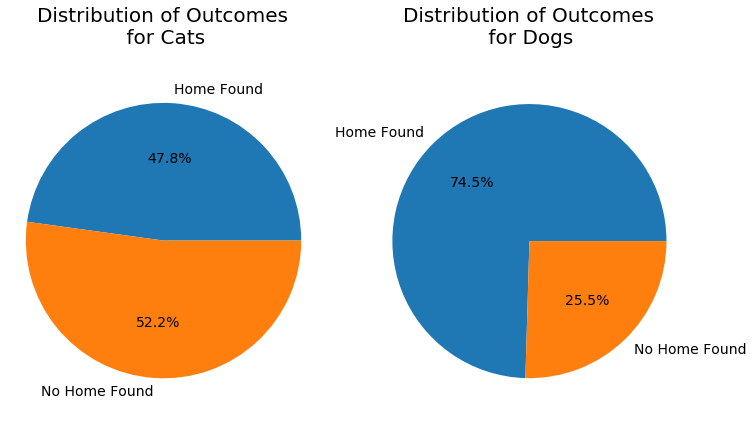

In [4]:
# Set figure and font size
plt.subplots(figsize=(12, 7))
plt.rc('font', size=14)

# Create pie chart for cat outcomes
plt.subplot(1, 2, 1)
cat_homes = [(cats['Found Home'] == 1).sum(), (cats['Found Home'] == 0).sum()]
labels1 = ['Home Found', 'No Home Found']
plt.pie(cat_homes,
        labels=labels1,
        autopct='%1.1f%%'
       )

# plot formatting
plt.axis('equal')
plt.title('Distribution of Outcomes\n for Cats', size=20)


# Create pie chart for dog outcomes
plt.subplot(1, 2, 2)
dog_homes = [(dogs['Found Home'] == 1).sum(), (dogs['Found Home'] == 0).sum()]
labels2 = ['Home Found', 'No Home Found']
plt.pie(dog_homes,
        labels=labels2,
        autopct='%1.1f%%'
       )

# plot formatting
plt.axis('equal')
plt.title('Distribution of Outcomes\n for Dogs', size=20)

plt.show()

We can see here that dogs are much more likely to have an outcome resulting in a permanent home than cats.

We can also break these outcomes down further by their specific outcome type:

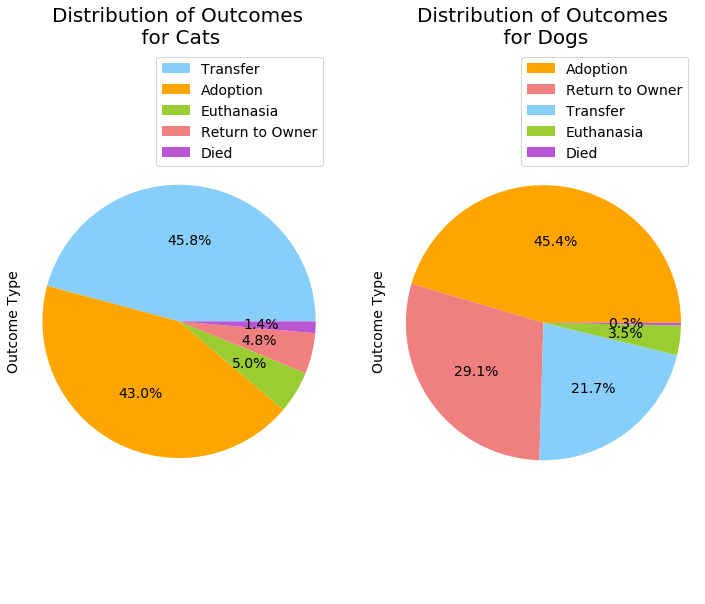

In [5]:
# Set figure and font size
plt.subplots(figsize=(12, 10))
plt.rc('font', size=14)

# Create pie chart for cat outcomes
plt.subplot(1, 2, 1)
cats['Outcome Type'].value_counts().plot(kind='pie',
                                         autopct='%1.1f%%',
                                         labels=None,
                                         legend=True,
                                         colors=['lightskyblue', 'orange', 'yellowgreen',  'lightcoral', 'mediumorchid']
                                        )

# plot formatting
plt.axis('equal')
plt.title('Distribution of Outcomes\n for Cats', size=20)


# Create pie chart for dog outcomes
plt.subplot(1, 2, 2)
dogs['Outcome Type'].value_counts().plot(kind='pie',
                                         autopct='%1.1f%%',
                                         labels=None,
                                         legend=True,
                                         colors=['orange', 'lightcoral', 'lightskyblue', 'yellowgreen',  'mediumorchid']
                                        )

# plot formatting
plt.axis('equal')
plt.title('Distribution of Outcomes\n for Dogs', size=20)

plt.show()

While numbers for adoption are similar for both cats and dogs, many more dogs are classified as 'Return to Owner' than cats, which denotes dogs that were lost and returned to their owners. A large majority of cats are transferred to other facilities, which may indicate that other facilities are either better equipped to handle the volume of cats, or simply that the real estate at the Austin Animal Center does not allow support for enough cats.

### 2. Analysis of Adoption Outcomes vs. Animal Attributes

In understanding the animal attributes that most affect the outcomes of animals at this center, we can identify which animals have a higher chance of being adopted for this area. This, in conjunction with data on neighboring or partner centers might allow for avenues to 'match' animals that can maximize their chance of adoption in each area.


#### i. Gender

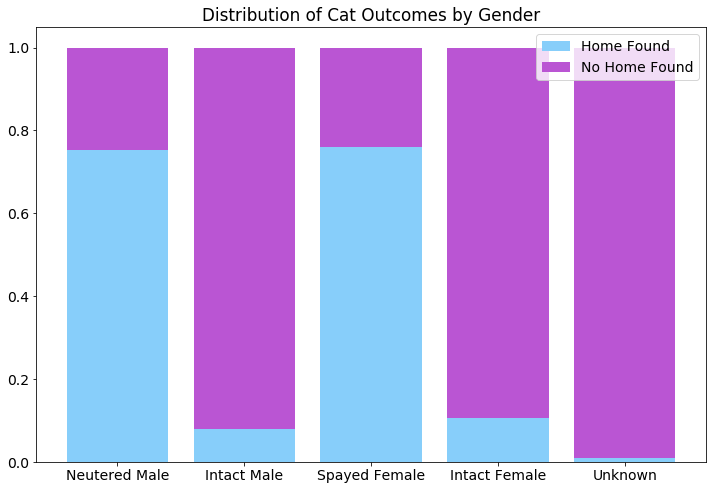

In [6]:
# Separate Cats by Sex upon Outcome
male_n = cats[cats['Sex upon Outcome'] == 'Neutered Male']
male_i = cats[cats['Sex upon Outcome'] == 'Intact Male']
female_s = cats[cats['Sex upon Outcome'] == 'Spayed Female']
female_i = cats[cats['Sex upon Outcome'] == 'Intact Female']
unknown = cats[cats['Sex upon Outcome'] == 'Unknown']

# find percentages of cats that found homes
cat_homes_pct = [(male_n['Found Home'] == 1).sum()/male_n.shape[0],
             (male_i['Found Home'] == 1).sum()/male_i.shape[0],
             (female_s['Found Home'] == 1).sum()/female_s.shape[0],
             (female_i['Found Home'] == 1).sum()/female_i.shape[0],
             (unknown['Found Home'] == 1).sum()/unknown.shape[0]]

cat_no_homes_pct = [(male_n['Found Home'] == 0).sum()/male_n.shape[0],
             (male_i['Found Home'] == 0).sum()/male_i.shape[0],
             (female_s['Found Home'] == 0).sum()/female_s.shape[0],
             (female_i['Found Home'] == 0).sum()/female_i.shape[0],
             (unknown['Found Home'] == 0).sum()/unknown.shape[0]]

# Create stacked bar chart to compare outcome vs. sex upon outcome
fig, ax = plt.subplots(figsize=(12,8))
plt.rc('font', size=14)

ind = np.arange(5)

p1 = ax.bar(ind,
            cat_homes_pct,
            color='lightskyblue')

p2 = ax.bar(ind,
            cat_no_homes_pct,
            bottom=cat_homes_pct,
            color='mediumorchid')

ax.set_title('Distribution of Cat Outcomes by Gender')
ax.set_xticks(ind)
ax.set_xticklabels(('Neutered Male', 'Intact Male', 'Spayed Female', 'Intact Female', 'Unknown'))

ax.legend((p1[0], p2[0]), ('Home Found', 'No Home Found'), loc='best')
ax.autoscale_view()

plt.show()

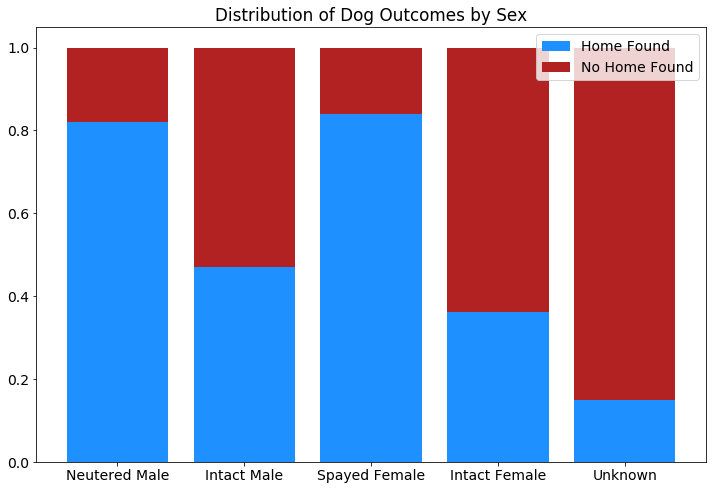

In [7]:
# Separate dogs by Sex upon Outcome
male_n = dogs[dogs['Sex upon Outcome'] == 'Neutered Male']
male_i = dogs[dogs['Sex upon Outcome'] == 'Intact Male']
female_s = dogs[dogs['Sex upon Outcome'] == 'Spayed Female']
female_i = dogs[dogs['Sex upon Outcome'] == 'Intact Female']
unknown = dogs[dogs['Sex upon Outcome'] == 'Unknown']

# find percentages of dogs that found homes
dog_homes_pct = [(male_n['Found Home'] == 1).sum()/male_n.shape[0],
             (male_i['Found Home'] == 1).sum()/male_i.shape[0],
             (female_s['Found Home'] == 1).sum()/female_s.shape[0],
             (female_i['Found Home'] == 1).sum()/female_i.shape[0],
             (unknown['Found Home'] == 1).sum()/unknown.shape[0]]

dog_no_homes_pct = [(male_n['Found Home'] == 0).sum()/male_n.shape[0],
             (male_i['Found Home'] == 0).sum()/male_i.shape[0],
             (female_s['Found Home'] == 0).sum()/female_s.shape[0],
             (female_i['Found Home'] == 0).sum()/female_i.shape[0],
             (unknown['Found Home'] == 0).sum()/unknown.shape[0]]

# Create stacked bar chart to compare outcome vs. sex upon outcome
fig, ax = plt.subplots(figsize=(12,8))
plt.rc('font', size=14)

ind = np.arange(5)

p1 = ax.bar(ind,
            dog_homes_pct,
            color='dodgerblue')

p2 = ax.bar(ind,
            dog_no_homes_pct,
            bottom=dog_homes_pct,
            color='firebrick')

ax.set_title('Distribution of Dog Outcomes by Sex')
ax.set_xticks(ind)
ax.set_xticklabels(('Neutered Male', 'Intact Male', 'Spayed Female', 'Intact Female', 'Unknown'))

ax.legend((p1[0], p2[0]), ('Home Found', 'No Home Found'), loc='best')
ax.autoscale_view()

plt.show()

The distribution of outcomes for male and females in the cases of both cats and dogs shows that there is not a strong preference for either gender. Naturally, since animals are spayed and neutered when possible at animal shelters, most adoptions occur for these types rather than intact gender animals.

#### ii. Age

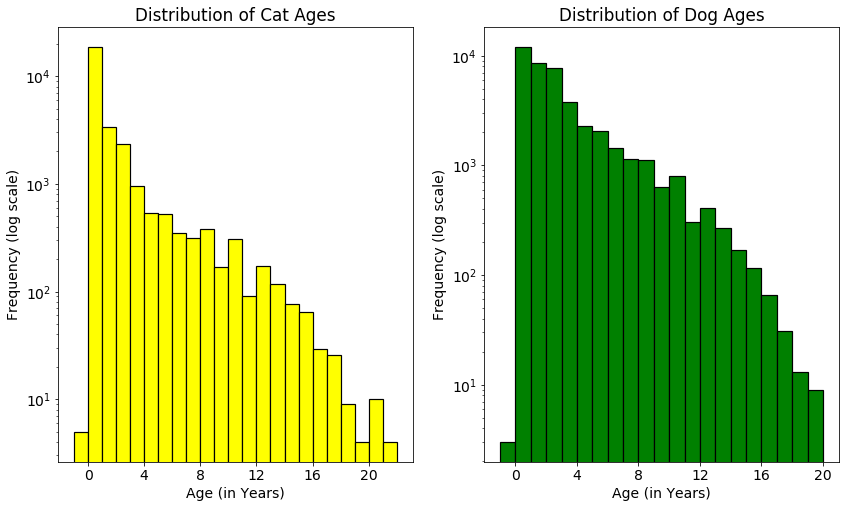

In [8]:
# Convert ages to years
cat_ages_in_years = cats['Age upon Outcome'].apply(lambda x: x//timedelta(days=365.25))
dog_ages_in_years = dogs['Age upon Outcome'].apply(lambda x: x//timedelta(days=365.25))

# Plot distribution of cat ages
plt.subplots(figsize=(14,8))
plt.subplot(1, 2, 1)
plt.hist(cat_ages_in_years, bins=23, color='yellow', edgecolor='black', linewidth=1.2)
plt.title('Distribution of Cat Ages')
plt.ylabel('Frequency (log scale)')
plt.xlabel('Age (in Years)')
plt.yscale('log')
plt.xticks([0, 4, 8, 12, 16, 20])

# Plot distribution of dog ages
plt.subplot(1, 2, 2)
plt.hist(dog_ages_in_years, bins=21, color='green', edgecolor='black', linewidth=1.2)
plt.title('Distribution of Dog Ages')
plt.yscale('log')
plt.ylabel('Frequency (log scale)')
plt.xlabel('Age (in Years)')
plt.xticks([0, 4, 8, 12, 16, 20])

plt.show()

There seems to be a wide spread of ages for both cats and dogs, up to 22 years for cats and 20 years for dogs. Most of the animals are less than 4 years old in both cases. It would also be helpful to see the breakdown of outcomes for each of these age groups.

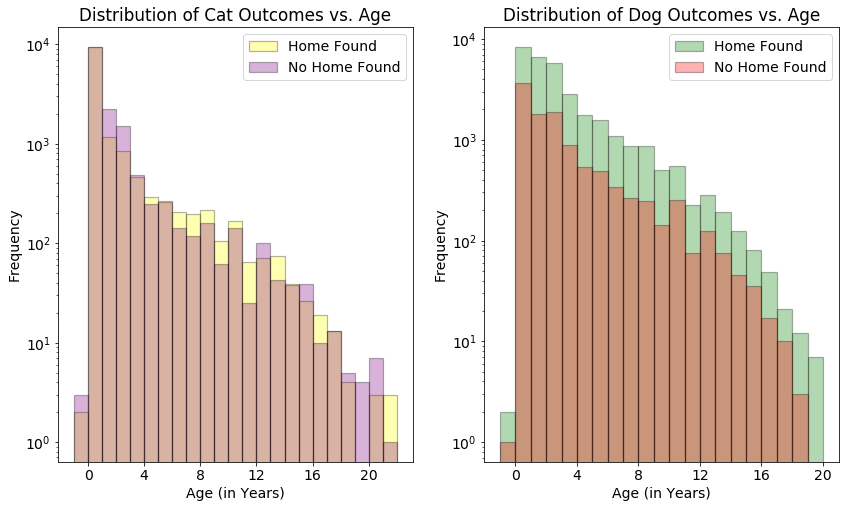

In [9]:
cat_ages_in_years[cats['Found Home'] == 0]

# Plot distribution of cat ages for cats who found homes
plt.subplots(figsize=(14,8))
plt.subplot(1, 2, 1)
cats_fh_freq, cats_bins, _ = plt.hist(cat_ages_in_years[cats['Found Home'] == 1],
                                      bins=23, 
                                      color='yellow', 
                                      edgecolor='black', 
                                      linewidth=1.2, 
                                      alpha = 0.3
                                     )
cats_nofh_freq, _, _ = plt.hist(cat_ages_in_years[cats['Found Home'] == 0],
                                bins=23,
                                color='purple',
                                edgecolor='black',
                                linewidth=1.2,
                                alpha = 0.3
                               )
plt.legend(['Home Found', 'No Home Found'])
plt.title('Distribution of Cat Outcomes vs. Age')
plt.ylabel('Frequency')
plt.xlabel('Age (in Years)')
plt.yscale('log')
plt.xticks([0, 4, 8, 12, 16, 20])

# Plot distribution of dog ages
plt.subplot(1, 2, 2)
dogs_fh_freq, dogs_bins, _ = plt.hist(dog_ages_in_years[dogs['Found Home'] == 1],
                                      bins=21, 
                                      color='green', 
                                      edgecolor='black',
                                      linewidth=1.2,
                                      alpha = 0.3
                                     )
dogs_nofh_freq, _, _ = plt.hist(dog_ages_in_years[dogs['Found Home'] == 0],
                                bins=20, 
                                color='red', 
                                edgecolor='black', 
                                linewidth=1.2, 
                                alpha = 0.3
                               )
plt.legend(['Home Found', 'No Home Found'])
plt.title('Distribution of Dog Outcomes vs. Age')
plt.yscale('log')
plt.ylabel('Frequency')
plt.xlabel('Age (in Years)')
plt.xticks([0, 4, 8, 12, 16, 20])

plt.show()

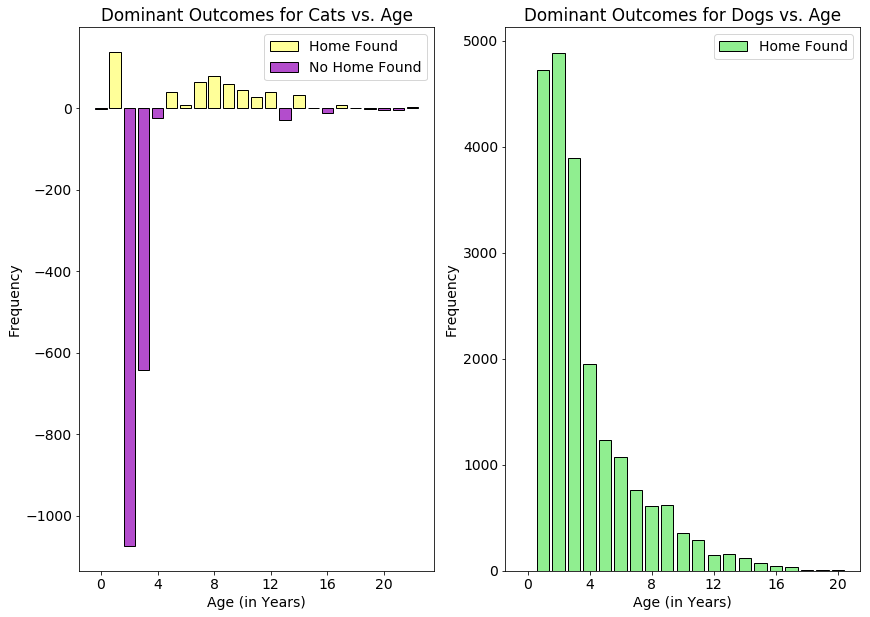

In [10]:
# Add a zero value to the last bin of dogs_nofh_freq so that it matches the number of bins of dogs who found homes
dogs_nofh_freq2 = np.append(dogs_nofh_freq, 0)

# Initialize figure
plt.subplots(figsize=(14,10))

# Display difference between cats that either found homes or did not find homes
plt.subplot(1, 2, 1)

# Generate differenct colors for positive and negative values
cat_colors = np.array([(0.7,0.3,0.8)]*len(cats_fh_freq))
cat_colors[cats_fh_freq-cats_nofh_freq >= 0] = (1,1,0.6)

# Create bar graph
barlist=plt.bar(cats_bins[1:], 
                cats_fh_freq-cats_nofh_freq, 
                color=cat_colors, 
                edgecolor='k'
               )
plt.ylabel('Frequency')
plt.xlabel('Age (in Years)')
plt.xticks([0, 4, 8, 12, 16, 20])
plt.title('Dominant Outcomes for Cats vs. Age')

# Create a legend for cat outcomes plot
pos_patch = mpatches.Patch(facecolor=(1,1,0.6), edgecolor='k', label='Home Found')
neg_patch = mpatches.Patch(facecolor=(0.7,0.3,0.8), edgecolor='k', label='No Home Found')
plt.legend(handles=[pos_patch, neg_patch])

# Display difference between cats that either found homes or did not find homes
plt.subplot(1, 2, 2)
plt.bar(dogs_bins[1:], 
        dogs_fh_freq-dogs_nofh_freq2, 
        color='lightgreen', 
        edgecolor='k'
       )
plt.ylabel('Frequency')
plt.xlabel('Age (in Years)')
plt.xticks([0, 4, 8, 12, 16, 20])
plt.title('Dominant Outcomes for Dogs vs. Age')
plt.legend(['Home Found'])


plt.show()

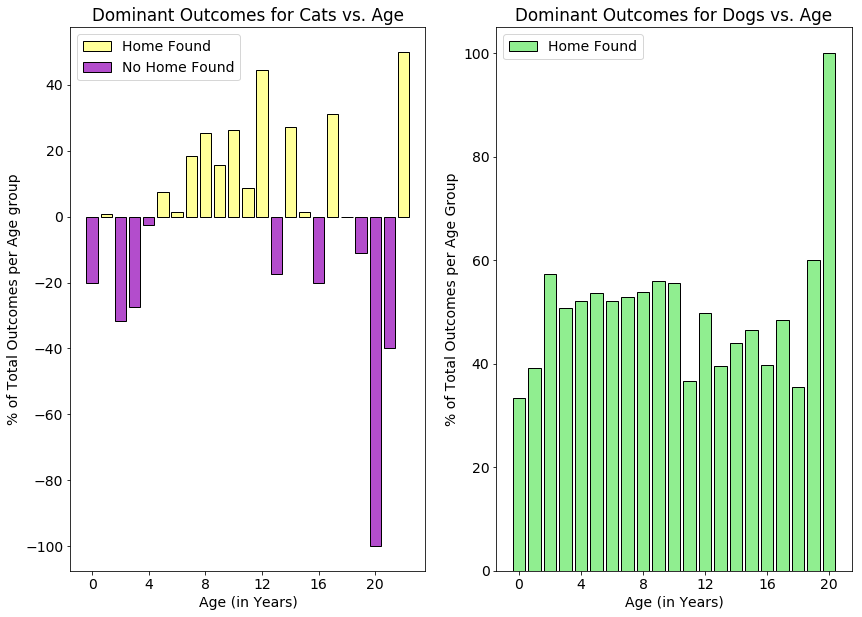

In [11]:
# Add a zero value to the last bin of dogs_nofh_freq so that it matches the number of bins of dogs who found homes
dogs_nofh_freq2 = np.append(dogs_nofh_freq, 0)

# Initialize figure
plt.subplots(figsize=(14,10))

# Display difference between cats that either found homes or did not find homes
plt.subplot(1, 2, 1)

# Generate differenct colors for positive and negative values
cat_colors = np.array([(0.7,0.3,0.8)]*len(cats_fh_freq))
cat_colors[cats_fh_freq-cats_nofh_freq >= 0] = (1,1,0.6)

# Create bar graph
barlist=plt.bar(cats_bins[1:], 
                100*(cats_fh_freq-cats_nofh_freq)/(cats_fh_freq+cats_nofh_freq), 
                color=cat_colors, 
                edgecolor='k'
               )
plt.ylabel('% of Total Outcomes per Age group')
plt.xlabel('Age (in Years)')
plt.xticks([0, 4, 8, 12, 16, 20])
plt.title('Dominant Outcomes for Cats vs. Age')

# Create a legend for cat outcomes plot
pos_patch = mpatches.Patch(facecolor=(1,1,0.6), edgecolor='k', label='Home Found')
neg_patch = mpatches.Patch(facecolor=(0.7,0.3,0.8), edgecolor='k', label='No Home Found')
plt.legend(handles=[pos_patch, neg_patch])

# Display difference between cats that either found homes or did not find homes
plt.subplot(1, 2, 2)
plt.bar(dogs_bins[1:], 
        100*(dogs_fh_freq-dogs_nofh_freq2)/(dogs_fh_freq+dogs_nofh_freq2), 
        color='lightgreen', 
        edgecolor='k'
       )
plt.ylabel('% of Total Outcomes per Age Group')
plt.xlabel('Age (in Years)')
plt.xticks([0, 4, 8, 12, 16, 20])
plt.title('Dominant Outcomes for Dogs vs. Age')
plt.legend(['Home Found'])


plt.show()

As shown above, we can see that while all age groups have a higher frequency of dogs that are placed/returned to their homes, cats have a more complicated distribution. Both young (< 5 years old) and old (> 12 years old) seem to have mixed chances of being placed in a permanent home.

One interesting note is that in both cases, the oldest animals seem to have higher chances of adoption.

#### iii. Breed

In [12]:
# Generate Top 10 ranking breeds for cats by frequency
top10_cat_breeds = pd.DataFrame(data= {'Cat Breed': cats['Breed'].value_counts().index.values[:10],
                   '# of Cats': cats['Breed'].value_counts().values[:10]},
             columns = ['Cat Breed', '# of Cats'],
             index=range(1,11)
                    )

# Label the index as ranking
top10_cat_breeds.index.name = 'Rank'

# Display top10 rankings
print('10 Most Common Cat Breeds\n',top10_cat_breeds)
print('\nTotal Number of Distinct Cat Breeds: {0}'.format(len(cats['Breed'].unique())))
print('Fraction of Total Cats Occupied by 10 most common breeds: {:0.2f} %'.format(100*cats['Breed'].value_counts()[:10].sum()/cats['Breed'].value_counts().sum()))

# Generate Top 10 ranking breeds for dogs by frequency
top10_dog_breeds = pd.DataFrame(data= {'Dog Breed': dogs['Breed'].value_counts().index.values[:10],
                   '# of Dogs': dogs['Breed'].value_counts().values[:10]},
             columns = ['Dog Breed', '# of Dogs'],
             index=range(1,11)
                    )

# Label the index as ranking
top10_dog_breeds.index.name = 'Rank'

# Display top10 rankings
print('\n\n10 Most Common Dog Breeds\n',top10_dog_breeds)
print('\nTotal Number of Distinct Dog Breeds: {0}'.format(len(dogs['Breed'].unique())))
print('Fraction of Total Dogs Occupied by 10 most common breeds: {:0.2f} %'.format(100*dogs['Breed'].value_counts()[:10].sum()/dogs['Breed'].value_counts().sum()))


10 Most Common Cat Breeds
                      Cat Breed  # of Cats
Rank                                     
1       Domestic Shorthair Mix      22773
2     Domestic Medium Hair Mix       2257
3        Domestic Longhair Mix       1204
4                  Siamese Mix        997
5           Domestic Shorthair        378
6       American Shorthair Mix        194
7                 Snowshoe Mix        150
8         Domestic Medium Hair        127
9               Maine Coon Mix        103
10                    Manx Mix         85

Total Number of Distinct Cat Breeds: 55
Fraction of Total Cats Occupied by 10 most common breeds: 98.53 %


10 Most Common Dog Breeds
                       Dog Breed  # of Dogs
Rank                                      
1                  Pit Bull Mix       6283
2        Labrador Retriever Mix       5628
3       Chihuahua Shorthair Mix       5264
4           German Shepherd Mix       2239
5     Australian Cattle Dog Mix       1281
6                 Dachshund Mix 

In  both categories, we can see that mixed breeds are the most common. This is not surprising, though the distribution above shows that the breeds of dogs are much more varied than cats. The 10 most common breeds of dogs only account for about 58% of the total population of dogs that have gone through the center, but for cats the 10 most common breeds account for over 98% of the entries.

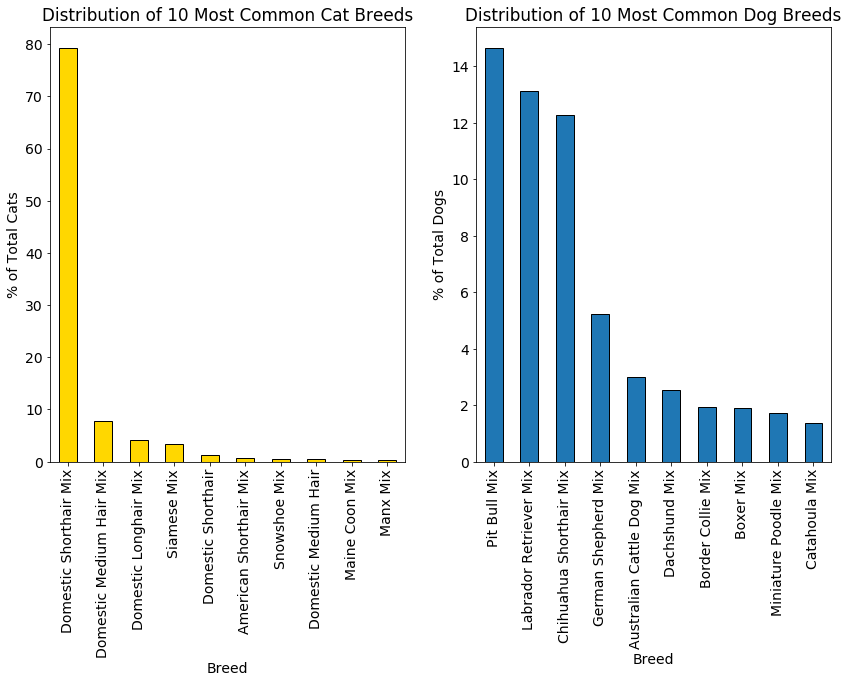

In [13]:
plt.subplots(figsize=(14, 8))

# Create plot to show distribution of most common cat breeds by percent of total cats
plt.subplot(1, 2, 1)
(100*cats['Breed'].value_counts()[:10]/cats['Breed'].value_counts().sum()).plot(kind='bar', color='gold', edgecolor='k')
plt.ylabel('% of Total Cats')
plt.xlabel('Breed')
plt.title('Distribution of 10 Most Common Cat Breeds')

# Create plot to show distribution of most common dog breeds by percent of total dogs
plt.subplot(1, 2, 2)
(100*dogs['Breed'].value_counts()[:10]/dogs['Breed'].value_counts().sum()).plot(kind='bar', edgecolor='k')
plt.ylabel('% of Total Dogs')
plt.xlabel('Breed')
plt.title('Distribution of 10 Most Common Dog Breeds')

plt.show()

In the plot shown above, we can see that Domestic Shorthair mixed breeds in cats account for almost 80% of the cat entries alone. All entries in the most common cat breeds are mixed, since 'Domestic Shorthair' and 'Domestic Medium Hair' breeds are themselves mixed breed classifications.

Next we can investigate the outcomes by breed:

In [14]:
# Find percentage of cats that found homes by breed
cat_breeds_fh = {}
for breed in cats['Breed'].unique():
    fh_temp = cats.loc[(cats['Found Home'] == 1) & (cats['Breed'] == breed)].shape[0]
    total_temp = cats.loc[cats['Breed'] == breed].shape[0]
    cat_breeds_fh[breed] = fh_temp/total_temp

# Create ranking lists
top10_cat_breeds_fh = pd.Series(cat_breeds_fh).sort_values(ascending=False)[:10]
bottom10_cat_breeds_fh = pd.Series(cat_breeds_fh).sort_values()[:10]

# Format dataframe for display
top10_cat_breeds_fh2 = pd.DataFrame(data={'Breed': top10_cat_breeds_fh.index,
                                          '% of Breed that Found Home': 100*top10_cat_breeds_fh.values
                                         },
                                    columns=['Breed', '% of Breed that Found Home'],
                                    index=range(1,11)
                                   )

bottom10_cat_breeds_fh2 = pd.DataFrame(data={'Breed': bottom10_cat_breeds_fh.index,
                                          '% of Breed that Found Home': 100*bottom10_cat_breeds_fh.values
                                         },
                                    columns=['Breed', '% of Breed that Found Home'],
                                    index=range(1,11)
                                   )

# Rename index to ranking
top10_cat_breeds_fh2.index.name = 'Rank'
bottom10_cat_breeds_fh2.index.name = 'Rank'


# Display Rankings
print('Cat Breeds with highest percentage of Homes Found\n', top10_cat_breeds_fh2)
print('\nCat Breeds with lowest percentage of Homes Found\n', bottom10_cat_breeds_fh2)

Cat Breeds with highest percentage of Homes Found
                        Breed  % of Breed that Found Home
Rank                                                    
1            Turkish Van Mix                       100.0
2          British Shorthair                       100.0
3              Devon Rex Mix                       100.0
4            Cornish Rex Mix                       100.0
5     Munchkin Shorthair Mix                       100.0
6                 Ocicat Mix                       100.0
7            Oriental Sh Mix                       100.0
8           Havana Brown Mix                       100.0
9                    Burmese                       100.0
10    Pixiebob Shorthair Mix                       100.0

Cat Breeds with lowest percentage of Homes Found
                          Breed  % of Breed that Found Home
Rank                                                      
1         Exotic Shorthair Mix                    0.000000
2                         Manx       

All of the cat breeds with the highest percentages of placement in permanent homes represent breeds that are somewhat exotic when compared to the population that can be found in Austin, TX. We can also see that the Domestic Shorthair Mix that dominates the cat population in this dataset has a fairly low rate of adoption with ~46%.

In [15]:
# Find percentage of dogs that found homes by breed
dog_breeds_fh = {}
for breed in dogs['Breed'].unique():
    fh_temp = dogs.loc[(dogs['Found Home'] == 1) & (dogs['Breed'] == breed)].shape[0]
    total_temp = dogs.loc[dogs['Breed'] == breed].shape[0]
    dog_breeds_fh[breed] = fh_temp/total_temp

# Create ranking lists
top10_dog_breeds_fh = pd.Series(dog_breeds_fh).sort_values(ascending=False)[:10]
bottom10_dog_breeds_fh = pd.Series(dog_breeds_fh).sort_values()[:10]

# Format dataframe for display
top10_dog_breeds_fh2 = pd.DataFrame(data={'Breed': top10_dog_breeds_fh.index,
                                          '% of Breed that Found Home': 100*top10_dog_breeds_fh.values
                                         },
                                    columns=['Breed', '% of Breed that Found Home'],
                                    index=range(1,11)
                                   )

bottom10_dog_breeds_fh2 = pd.DataFrame(data={'Breed': bottom10_dog_breeds_fh.index,
                                          '% of Breed that Found Home': 100*bottom10_dog_breeds_fh.values
                                         },
                                    columns=['Breed', '% of Breed that Found Home'],
                                    index=range(1,11)
                                   )

# Rename index to ranking
top10_dog_breeds_fh2.index.name = 'Rank'
bottom10_dog_breeds_fh2.index.name = 'Rank'


# Display Rankings
print('Dog Breeds with highest percentage of Homes Found\n', top10_dog_breeds_fh2)
print('\nDog Breeds with lowest percentage of Homes Found\n', bottom10_dog_breeds_fh2)

Dog Breeds with highest percentage of Homes Found
                    Breed  % of Breed that Found Home
Rank                                                
1      Affenpinscher Mix                       100.0
2        Norfolk Terrier                       100.0
3               Boerboel                       100.0
4       Mexican Hairless                       100.0
5     Manchester Terrier                       100.0
6      Bouv Flandres Mix                       100.0
7          Silky Terrier                       100.0
8            Lowchen Mix                       100.0
9     Smooth Fox Terrier                       100.0
10            Leonberger                       100.0

Dog Breeds with lowest percentage of Homes Found
                          Breed  % of Breed that Found Home
Rank                                                      
1          Spanish Mastiff Mix                         0.0
2                        Jindo                         0.0
3                     Land

The distribution for dogs similarly shows that exotic breeds seem to occupy many of the top ranking spots for adoption rates, although the wide variety of dog breeds also shows that there are many breeds that don't fare well. This might indicate that breed alone is not a good enough indication of the chances of adoption.

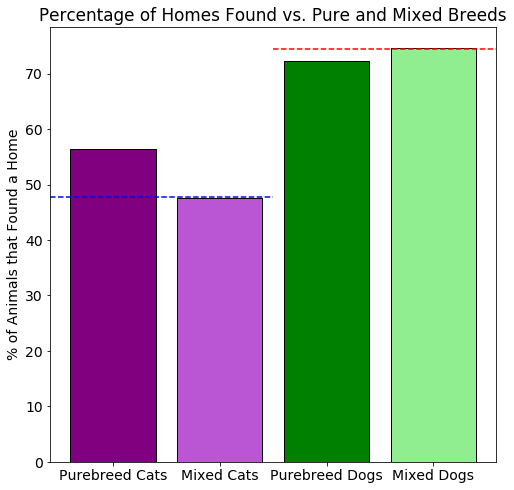

In [34]:
# Cat Breed vs. Mixed
mixed_cats = cats[cats['Breed'].str.contains('Mix')]['Found Home']
pure_cats = cats[~cats['Breed'].str.contains('Mix')]['Found Home']

pure_cats_fh = 100*(pure_cats == 1).sum()/pure_cats.shape[0]
mixed_cats_fh = 100*(mixed_cats == 1).sum()/mixed_cats.shape[0]

# Dog Breed vs. Mixed
mixed_dogs = dogs[dogs['Breed'].str.contains('Mix')]['Found Home']
pure_dogs = dogs[~dogs['Breed'].str.contains('Mix')]['Found Home']

pure_dogs_fh = 100*(pure_dogs == 1).sum()/pure_dogs.shape[0]
mixed_dogs_fh = 100*(mixed_dogs == 1).sum()/mixed_dogs.shape[0]

# Generate plot
fig, ax = plt.subplots(figsize=(8,8))
ax.bar(list(range(4)), 
        np.array([pure_cats_fh, mixed_cats_fh, pure_dogs_fh, mixed_dogs_fh]), 
        color=['purple','mediumorchid','green','lightgreen'], 
        edgecolor='k'
       )
ax.set_title('Percentage of Homes Found vs. Pure and Mixed Breeds')
ax.set_xticks(list(range(4)))
ax.set_xticklabels(('Purebreed Cats', 'Mixed Cats', 'Purebreed Dogs', 'Mixed Dogs'))
plt.ylabel('% of Animals that Found a Home')

# Draw lines at average value of FH for cats and dogs
plt.axhline(y=47.8, xmin=0, xmax=0.5, color='b', linestyle='--')
plt.axhline(y=74.5, xmin=0.5, xmax=1, color='r', linestyle='--')

# Display plot
plt.show()

We can see that there are two opposing trends for cats and dogs here. For cats, purebreeds have a noticeably higher rate of adoption, while dogs see a drop in adoption rates for those that are not mixed breeds. This may be related to the high occurences of Domestic Shorthair cats at the center. When people come in to browse for pet adoption, it is easier for purebreeds to stand out in appearance when most cats are similar. The distribution of breeds for dogs are much more varied, and so this may not have the same impact on adoptions for dogs.

#### iv. Colors

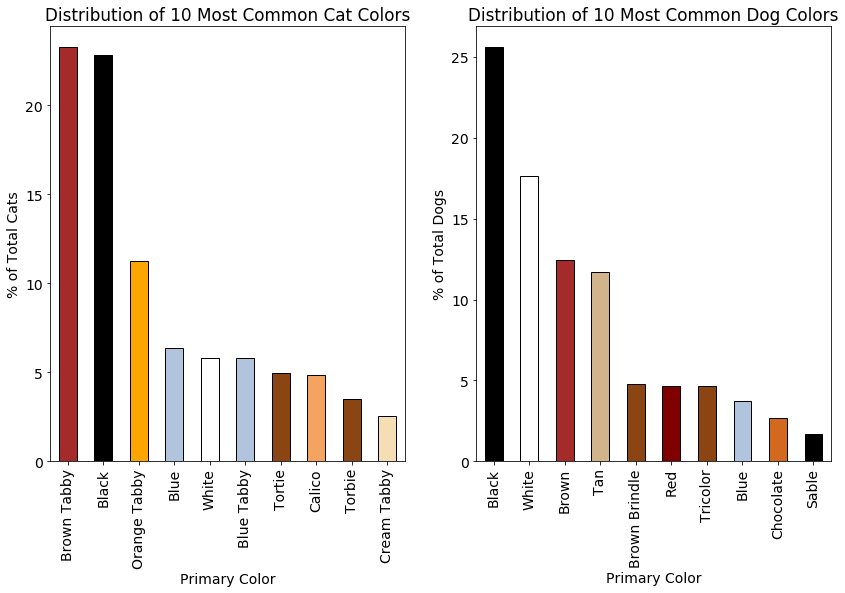

In [17]:
# Most Common Colors
plt.subplots(figsize=(14, 8))

# Create plot to show distribution of most common cat colors by percent of total cats
plt.subplot(1, 2, 1)
cat_colors=['brown', 'black', 'orange', 'lightsteelblue', 'white', 'lightsteelblue', 'saddlebrown', 'sandybrown', 'saddlebrown', 'wheat']
(100*cats['Primary Color'].value_counts()[:10]/cats['Primary Color'].value_counts().sum()).plot(kind='bar', color=[cat_colors], edgecolor='k')
plt.ylabel('% of Total Cats')
plt.xlabel('Primary Color')
plt.title('Distribution of 10 Most Common Cat Colors')

# Create plot to show distribution of most common dog colors by percent of total dogs
plt.subplot(1, 2, 2)
dog_colors=['black', 'white', 'brown', 'tan', 'saddlebrown', 'maroon', 'saddlebrown', 'lightsteelblue', 'chocolate', 'black']
(100*dogs['Primary Color'].value_counts()[:10]/dogs['Primary Color'].value_counts().sum()).plot(kind='bar', color=[dog_colors], edgecolor='k')
plt.ylabel('% of Total Dogs')
plt.xlabel('Primary Color')
plt.title('Distribution of 10 Most Common Dog Colors')

plt.show()

Above are the 10 most common colors for both cats and dogs. If we investigate the rates of placement in permanent homes by color, it may be possible to extract information on which color animals are preferred by people looking for pets at the Austin Animal Center.

In [18]:
## Find percentage of cats that found homes by primary color
cat_colors_fh = {}
for color in cats['Primary Color'].unique():
    fh_temp = cats.loc[(cats['Found Home'] == 1) & (cats['Primary Color'] == color)].shape[0]
    total_temp = cats.loc[cats['Primary Color'] == color].shape[0]
    cat_colors_fh[color] = fh_temp/total_temp

# Create ranking lists
top10_cat_colors_fh = pd.Series(cat_colors_fh).sort_values(ascending=False)[:10]
bottom10_cat_colors_fh = pd.Series(cat_colors_fh).sort_values()[:10]

# Format dataframe for display
top10_cat_colors_fh2 = pd.DataFrame(data={'Primary Color': top10_cat_colors_fh.index,
                                          '% of Color that Found Home': 100*top10_cat_colors_fh.values
                                         },
                                    columns=['Primary Color', '% of Color that Found Home'],
                                    index=range(1,11)
                                   )

bottom10_cat_colors_fh2 = pd.DataFrame(data={'Primary Color': bottom10_cat_colors_fh.index,
                                          '% of Color that Found Home': 100*bottom10_cat_colors_fh.values
                                         },
                                    columns=['Primary Color', '% of Color that Found Home'],
                                    index=range(1,11)
                                   )

# Rename index to ranking
top10_cat_colors_fh2.index.name = 'Rank'
bottom10_cat_colors_fh2.index.name = 'Rank'


# Display Rankings
print('Cat Colors with Highest percentage of Homes Found\n', top10_cat_colors_fh2)
print('\nCat Colors with Lowest percentage of Homes Found\n', bottom10_cat_colors_fh2)

Cat Colors with Highest percentage of Homes Found
         Primary Color  % of Color that Found Home
Rank                                             
1                Fawn                  100.000000
2             Apricot                  100.000000
3          Blue Smoke                   91.666667
4              Agouti                   66.666667
5        Tortie Point                   63.636364
6         Black Smoke                   62.878788
7     Chocolate Point                   61.016949
8         Flame Point                   58.208955
9           Chocolate                   57.692308
10         Lynx Point                   55.230126

Cat Colors with Lowest percentage of Homes Found
       Primary Color  % of Color that Found Home
Rank                                           
1          Tricolor                    0.000000
2              Pink                    0.000000
3     Black Brindle                    0.000000
4      Orange Tiger                    0.000000
5       Bl

In [19]:
# Find rankings of likelihood to find home for 10 most common colors
cat_color_fh_rankings = pd.Series(cat_colors_fh).sort_values(ascending=False)

print('Rankings of Colors Most Likely to Find Homes - for 10 Most Common Cat Colors')
for i in range(len(cat_color_fh_rankings)):
    if cat_color_fh_rankings.index[i] in cats['Primary Color'].value_counts().index[:10]:
        print('{0}: {1}'.format(cat_color_fh_rankings.index[i], i+1))

Rankings of Colors Most Likely to Find Homes - for 10 Most Common Cat Colors
Torbie: 11
Calico: 15
Cream Tabby: 16
Blue Tabby: 17
Blue: 22
Tortie: 23
Orange Tabby: 25
Brown Tabby: 27
White: 28
Black: 29


In [20]:
# Find percentage of dogs that found homes by primary color
dog_colors_fh = {}
for color in dogs['Primary Color'].unique():
    fh_temp = dogs.loc[(dogs['Found Home'] == 1) & (dogs['Primary Color'] == color)].shape[0]
    total_temp = dogs.loc[dogs['Primary Color'] == color].shape[0]
    dog_colors_fh[color] = fh_temp/total_temp

# Create ranking lists
top10_dog_colors_fh = pd.Series(dog_colors_fh).sort_values(ascending=False)[:10]
bottom10_dog_colors_fh = pd.Series(dog_colors_fh).sort_values()[:10]

# Format dataframe for display
top10_dog_colors_fh2 = pd.DataFrame(data={'Primary Color': top10_dog_colors_fh.index,
                                          '% of Color that Found Home': 100*top10_dog_colors_fh.values
                                         },
                                    columns=['Primary Color', '% of Color that Found Home'],
                                    index=range(1,11)
                                   )

bottom10_dog_colors_fh2 = pd.DataFrame(data={'Primary Color': bottom10_dog_colors_fh.index,
                                          '% of Color that Found Home': 100*bottom10_dog_colors_fh.values
                                         },
                                    columns=['Primary Color', '% of Color that Found Home'],
                                    index=range(1,11)
                                   )

# Rename index to ranking
top10_dog_colors_fh2.index.name = 'Rank'
bottom10_dog_colors_fh2.index.name = 'Rank'


# Display Rankings
print('Dog Colors with Highest percentage of Homes Found\n', top10_dog_colors_fh2)
print('\nDog Colors with Lowest percentage of Homes Found\n', bottom10_dog_colors_fh2)

Dog Colors with Highest percentage of Homes Found
        Primary Color  % of Color that Found Home
Rank                                            
1             Agouti                  100.000000
2              Ruddy                  100.000000
3        Black Tiger                  100.000000
4        Black Smoke                   92.307692
5         Blue Tiger                   90.625000
6     Yellow Brindle                   81.578947
7         Blue Merle                   80.890052
8             Silver                   80.373832
9        Brown Merle                   80.368098
10            Yellow                   78.360656

Dog Colors with Lowest percentage of Homes Found
      Primary Color  % of Color that Found Home
Rank                                          
1      Brown Tiger                   60.000000
2           Orange                   66.666667
3       Blue Smoke                   66.666667
4             Gold                   71.022727
5       Liver Tick          

In [21]:
# Find rankings of likelihood to find home for 10 most common colors
dog_color_fh_rankings = pd.Series(dog_colors_fh).sort_values(ascending=False)

print('Rankings of Colors Most Likely to Find Homes - for 10 Most Common Dog Colors')
for i in range(len(dog_color_fh_rankings)):
    if dog_color_fh_rankings.index[i] in dogs['Primary Color'].value_counts().index[:10]:
        print('{0}: {1}'.format(dog_color_fh_rankings.index[i], i+1))

Rankings of Colors Most Likely to Find Homes - for 10 Most Common Dog Colors
Chocolate: 14
Tricolor: 15
Blue: 17
Red: 19
Black: 20
Brown Brindle: 21
Tan: 22
Sable: 24
Brown: 25
White: 26


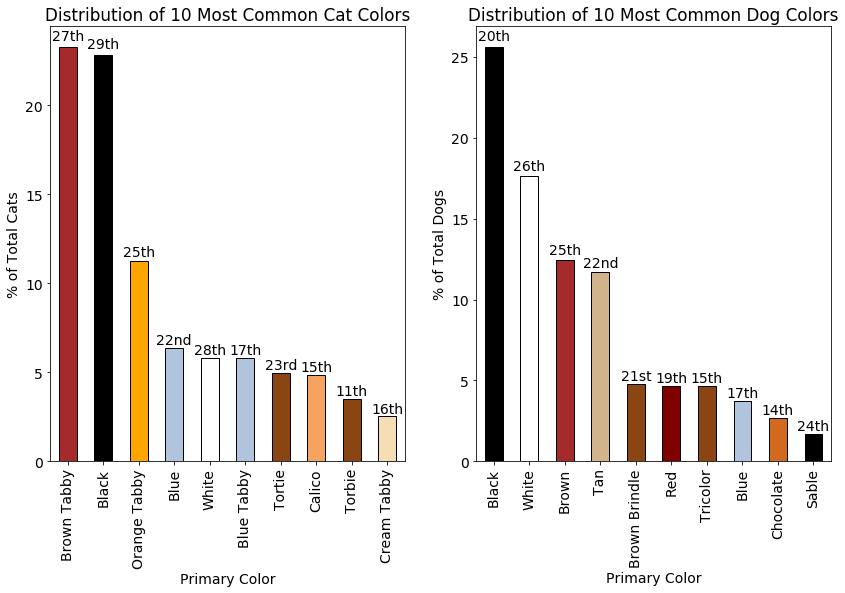

In [22]:
plt.subplots(figsize=(14, 8))

# Create plot to show distribution of most common cat colors by percent of total cats
plt.subplot(1, 2, 1)
cat_colors=['brown', 'black', 'orange', 'lightsteelblue', 'white', 'lightsteelblue', 'saddlebrown', 'sandybrown', 'saddlebrown', 'wheat']
ax1 = (100*cats['Primary Color'].value_counts()[:10]/cats['Primary Color'].value_counts().sum()).plot(kind='bar', color=[cat_colors], edgecolor='k')
plt.ylabel('% of Total Cats')
plt.xlabel('Primary Color')
plt.title('Distribution of 10 Most Common Cat Colors')

# Label bars with ranking of cats most likely to find homes
rects = ax1.patches
labels1 = ['27th', '29th', '25th', '22nd', '28th', '17th', '23rd', '15th', '11th', '16th']

for rect, label in zip(rects, labels1):
    height = rect.get_height()
    ax1.text(rect.get_x() + rect.get_width()/2, height*1.01, label, ha='center', va='bottom')
    
# Create plot to show distribution of most common dog colors by percent of total dogs
plt.subplot(1, 2, 2)
dog_colors=['black', 'white', 'brown', 'tan', 'saddlebrown', 'maroon', 'saddlebrown', 'lightsteelblue', 'chocolate', 'black']
ax2 = (100*dogs['Primary Color'].value_counts()[:10]/dogs['Primary Color'].value_counts().sum()).plot(kind='bar', color=[dog_colors], edgecolor='k')
plt.ylabel('% of Total Dogs')
plt.xlabel('Primary Color')
plt.title('Distribution of 10 Most Common Dog Colors')

# Label bars with ranking of dogs most likely to find homes
rects = ax2.patches
labels2 = ['20th', '26th', '25th', '22nd', '21st', '19th', '15th', '17th', '14th', '24th']

for rect, label in zip(rects, labels2):
    height = rect.get_height()
    ax2.text(rect.get_x() + rect.get_width()/2, height*1.01, label, ha='center', va='bottom')
    
plt.show()

The respective ranks in highest adoption rates for cats and dogs are denoted above the bars for each of the 10 most common colors. We can see again that none of the most common colors for both cats and dogs appear in their respective top lists of adoption rates. This further supports that a sense of exotic appearance of a pet may be a primary driver in people's choice of a pet.

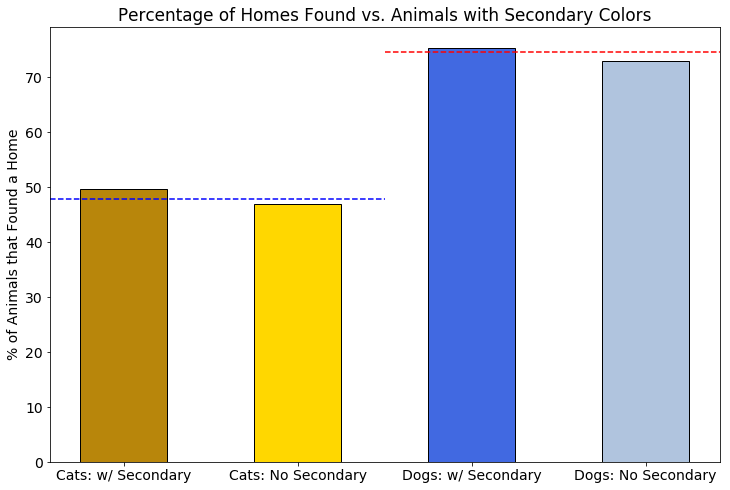

In [35]:
# % of Homes Found vs. cats with secondary colors
cats_secondary = cats[cats['Secondary Color'].notnull()]
cats_no_secondary = cats[~cats['Secondary Color'].notnull()]

cats_secondary_fh = 100*(cats_secondary['Found Home'] == 1).sum()/cats_secondary.shape[0]
cats_no_secondary_fh = 100*(cats_no_secondary['Found Home'] == 1).sum()/cats_no_secondary.shape[0]

# % of Homes Found vs. dogs with secondary colors
dogs_secondary = dogs[dogs['Secondary Color'].notnull()]
dogs_no_secondary = dogs[~dogs['Secondary Color'].notnull()]

dogs_secondary_fh = 100*(dogs_secondary['Found Home'] == 1).sum()/dogs_secondary.shape[0]
dogs_no_secondary_fh = 100*(dogs_no_secondary['Found Home'] == 1).sum()/dogs_no_secondary.shape[0]


# Generate plot
fig, ax = plt.subplots(figsize=(12,8))
ax.bar(list(range(4)),
       np.array([cats_secondary_fh, cats_no_secondary_fh, dogs_secondary_fh, dogs_no_secondary_fh]),
       color=['darkgoldenrod','gold','royalblue','lightsteelblue'],
       width=0.5,
       edgecolor='k'
       )
ax.set_title('Percentage of Homes Found vs. Animals with Secondary Colors')
ax.set_xticks(list(range(4)))
ax.set_xticklabels(('Cats: w/ Secondary', 'Cats: No Secondary', 'Dogs: w/ Secondary', 'Dogs: No Secondary'))
plt.ylabel('% of Animals that Found a Home')

# Draw a line at the average rat of FH for cats and dogs
plt.axhline(y=47.8, xmin=0, xmax=0.5, color='b', linestyle='--')
plt.axhline(y=74.5, xmin=0.5, xmax=1, color='r', linestyle='--')

# Display plot
plt.show()

The data above shows that for both cats and dogs, a secondary color slightly improves the rates of adoption. Animals with distinctive color combinations in their coats may stand out more visually to potential pet owners.

### 3. Analysis of Adoption Outcomes vs. Year

Finally, I will take a brief look at the trends of cat and dog adoptions by year. 

In [24]:
print('The dataset covers a time period between {0} and {1}'.format(data['DateTime'].min(), data['DateTime'].max()))

The dataset covers a time period between 2013-10-01 09:31:00 and 2017-12-10 12:59:00


In [25]:
# Reset indices for cats and dogs
cats.reset_index(drop=True, inplace=True)
dogs.reset_index(drop=True, inplace=True)


# Separate data into years and months
cat_years = []
cat_months = []

for cat in cats['DateTime']:
    cat_years.append(cat.year)
    cat_months.append(cat.month)
    
dog_years = []
dog_months = []

for dog in dogs['DateTime']:
    dog_years.append(dog.year)
    dog_months.append(dog.month)
    
# Convert collected months and years into Series format
cat_years = pd.Series(cat_years)
cat_months = pd.Series(cat_months)
dog_years = pd.Series(dog_years)
dog_months = pd.Series(dog_months)

In [26]:
# cat outcomes vs. year
cat_year_fh = []

for year in range(2013,2018):
    cat_year = 100*(cats[cat_years == year]['Found Home'] == 1).sum()/(cats[cat_years == year].shape[0])
    cat_year_fh.append(cat_year)

# dog outcomes vs. year
dog_year_fh = []

for year in range(2013,2018):
    dog_year = 100*(dogs[dog_years == year]['Found Home'] == 1).sum()/(dogs[dog_years == year].shape[0])
    dog_year_fh.append(dog_year)

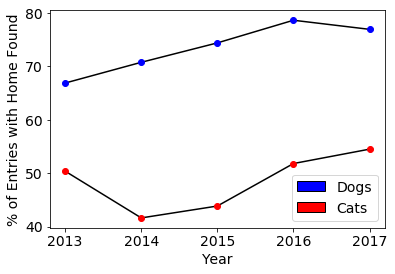

In [27]:
# Construct plots to show percentage trends of cats and dogs that found homes by year
plt.plot(range(2013,2018), list(cat_year_fh), 'k-')
plt.plot(range(2013,2018), list(cat_year_fh), 'ro')

plt.plot(range(2013,2018), list(dog_year_fh), 'k-')
plt.plot(range(2013,2018), list(dog_year_fh), 'bo')

# Plot formatting
plt.xlabel('Year')
plt.ylabel('% of Entries with Home Found')

# Create a legend for plot
cat_patch = mpatches.Patch(facecolor=(1, 0, 0), edgecolor='k', label='Cats')
dog_patch = mpatches.Patch(facecolor=(0, 0, 1), edgecolor='k', label='Dogs')
plt.legend(handles=[dog_patch, cat_patch])


# Display plot
plt.show()

The graph above shows the average rates of placement in permanent homes for cats and dogs broken down by year. Although dogs have experienced a relative upward trend with time, cats seem to show a drop in rates from 2013 to 2014, but then the same relative upward trend. This may be an anomaly of our dataset, since we only have 2013 data for the months of October-December. If there is a dependence on adoptions vs. months of the year, this can introduce a bias into the 2013 data points.

In [28]:
# cat outcomes vs. year
cat_month_fh = []

for month in range(1,13):
    cat_month = 100*(cats[cat_months == month]['Found Home'] == 1).sum()/(cats[cat_months == month].shape[0])
    cat_month_fh.append(cat_month)

# dog outcomes vs. year
dog_month_fh = []

for month in range(1,13):
    dog_month = 100*(dogs[dog_months == month]['Found Home'] == 1).sum()/(dogs[dog_months == month].shape[0])
    dog_month_fh.append(dog_month)

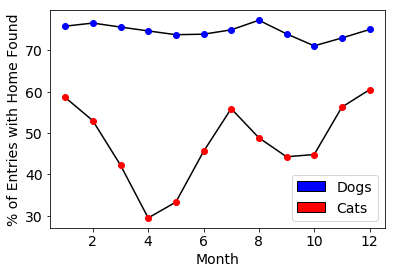

In [29]:
# Construct plots to show percentage trends of cats and dogs that found homes by month
plt.plot(range(1,13), list(cat_month_fh), 'k-')
plt.plot(range(1,13), list(cat_month_fh), 'ro')

plt.plot(range(1,13), list(dog_month_fh), 'k-')
plt.plot(range(1,13), list(dog_month_fh), 'bo')

# Plot formatting
plt.xlabel('Month')
plt.ylabel('% of Entries with Home Found')

# Create a legend for plot
cat_patch = mpatches.Patch(facecolor=(1, 0, 0), edgecolor='k', label='Cats')
dog_patch = mpatches.Patch(facecolor=(0, 0, 1), edgecolor='k', label='Dogs')
plt.legend(handles=[dog_patch, cat_patch])


# Display plot
plt.show()

By looking at the average adoption rates broken down by month we can see that for both cats and dogs, there seems to be spikes in adoptions around winter months (Nov. - Feb.) and summer months (Jun. - Aug.). The main difference here is that cats seem to have a much stronger dependence on the month of the year than dogs, which remains relatively consistent.

This suggests that the average placement rate value for 2013 found in the previous graph may not be representative of the placement rates for the entire year due to the data only being collected in October-December.

In [30]:
# cat outcomes vs. year
cat_monthyear_fh = []

for year in range(2014,2018):
    for month in range(1,13):
        cat_month = 100*(cats.loc[(cat_years == year) & (cat_months == month)]['Found Home'] == 1).sum()/(cats.loc[(cat_years == year) & (cat_months == month)].shape[0])
        cat_monthyear_fh.append(cat_month)

# dog outcomes vs. year
dog_monthyear_fh = []

for year in range(2014,2018):
    for month in range(1,13):
        dog_month = 100*(dogs.loc[(dog_years == year) & (dog_months == month)]['Found Home'] == 1).sum()/(dogs.loc[(dog_years == year) & (dog_months == month)].shape[0])
        dog_monthyear_fh.append(dog_month)

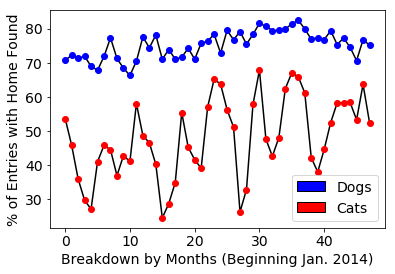

In [31]:
# Construct plots to show percentage trends of cats and dogs that found homes by month
plt.plot(range(len(cat_monthyear_fh)), list(cat_monthyear_fh), 'k-')
plt.plot(range(len(cat_monthyear_fh)), list(cat_monthyear_fh), 'ro')

plt.plot(range(len(dog_monthyear_fh)), list(dog_monthyear_fh), 'k-')
plt.plot(range(len(dog_monthyear_fh)), list(dog_monthyear_fh), 'bo')

# Plot formatting
plt.xlabel('Breakdown by Months (Beginning Jan. 2014)')
plt.ylabel('% of Entries with Home Found')

# Create a legend for plot
cat_patch = mpatches.Patch(facecolor=(1, 0, 0), edgecolor='k', label='Cats')
dog_patch = mpatches.Patch(facecolor=(0, 0, 1), edgecolor='k', label='Dogs')
plt.legend(handles=[dog_patch, cat_patch])


# Display plot
plt.show()

We can see that the variations in adoptions for cats is again much larger than that for dogs, which is relatively consistent. 

### Closing Remarks

In this project the Austin Animal Center dataset was investigated with a wide range of metrics to suggest which factors seem to influence the animals that are able to be placed in permanent homes vs. those which are not. It was shown that dogs have a much higher placement rate overall than cats, while attributes such as breed and color seem to have a strong influence on the placement rates for both cats and dogs.

### Thanks for Reading!